In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Step 1: import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay


In [3]:
# Step 2: load iris and create DataFrame
iris = load_iris(as_frame=True)
df = iris.frame  # includes features and target

print(df.shape)   # (150, 5)
print(df.head())


(150, 5)
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [4]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

In [5]:
#quick exploratory checks
print(df['target'].value_counts())        # class counts
print(df.describe())                      # basic stats


target
0    50
1    50
2    50
Name: count, dtype: int64
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


In [8]:
#features (X) and labels (y)
X = df[iris.feature_names]  # sepal/petal length & width
y = df['target']


In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.22, random_state=42 , stratify=y)

In [12]:
#standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)


In [13]:
#create and train logistic regression
model = LogisticRegression(
    multi_class='multinomial', solver='lbfgs', max_iter=200, random_state=42
)
model.fit(X_train_scaled, y_train)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=200, multi_class='multinomial', random_state=42)

In [14]:
#predict and evaluate
y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)  # predicted probabilities

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification report:\n", classification_report(y_test, y_pred, target_names=iris.target_names))


Accuracy: 0.9090909090909091

Classification report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       0.83      0.91      0.87        11
   virginica       0.90      0.82      0.86        11

    accuracy                           0.91        33
   macro avg       0.91      0.91      0.91        33
weighted avg       0.91      0.91      0.91        33



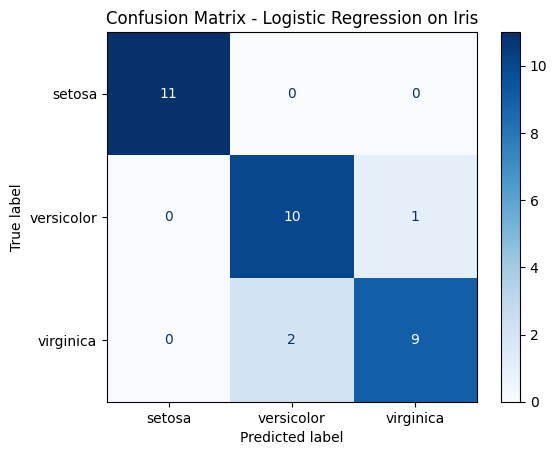

In [15]:
#confusion matrix plot
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap='Blues')    # optional style
plt.title("Confusion Matrix - Logistic Regression on Iris")
plt.show()


In [16]:
#test sample predictions with probabilities
for i in range(5):
    print("True:", iris.target_names[y_test.iloc[i]])
    print("Pred:", iris.target_names[y_pred[i]])
    print("Prob:", np.round(y_proba[i], 3))
    print("---")


True: setosa
Pred: setosa
Prob: [0.976 0.024 0.   ]
---
True: virginica
Pred: versicolor
Prob: [0.022 0.618 0.36 ]
---
True: versicolor
Pred: versicolor
Prob: [0.009 0.837 0.154]
---
True: virginica
Pred: virginica
Prob: [0.    0.073 0.927]
---
True: versicolor
Pred: versicolor
Prob: [0.031 0.942 0.026]
---


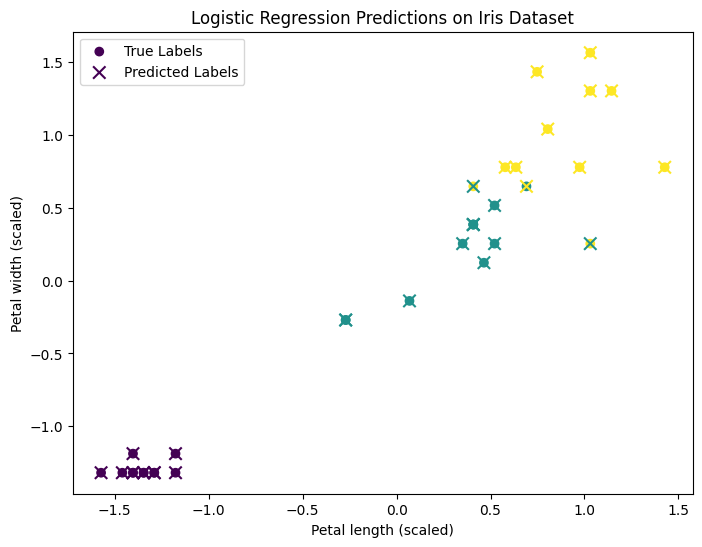

In [17]:
# predication on plot
import matplotlib.pyplot as plt

# Choose two features for easy plotting (petal length & petal width)
X_plot = X_test_scaled[:, [2, 3]]   # petal length, petal width
y_true = y_test.values
y_pred = y_pred

# Plot
plt.figure(figsize=(8,6))

# True labels (background)
plt.scatter(X_plot[:, 0], X_plot[:, 1], c=y_true, cmap='viridis', marker='o', label="True")

# Predicted labels (outlined points)
plt.scatter(X_plot[:, 0], X_plot[:, 1], c=y_pred, cmap='viridis',
            marker='x', s=80, label="Predicted")

plt.xlabel("Petal length (scaled)")
plt.ylabel("Petal width (scaled)")
plt.title("Logistic Regression Predictions on Iris Dataset")
plt.legend(["True Labels", "Predicted Labels"])
plt.show()
